# RNN 이해 및 실습 1

## 1. 시계열 데이터

In [ ]:
#n=15 -> n=5      #!!!
#SimpleRNN -> LSTM
#epoch =20 -> 30
#batch_size = 1 -> 20


- 예제 시계열 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xarr = np.array([100,200,300,400])
yarr = np.array([1,2,3,4])
cond = ([True,False,True,False])
np.where(cond,xarr,yarr) #cond True->xarr, False ->yarr

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))


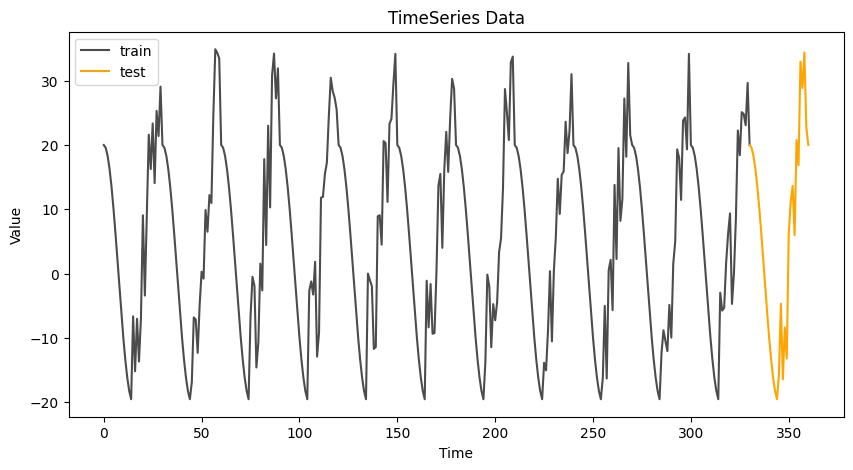

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30 * 11 + 1), time_series[:30 * 11 + 1], color = 'black', alpha = 0.7, label = 'train') # 학습용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], color = 'orange', label = 'test') # 테스트용 데이터
plt.legend()

In [ ]:
time_series[0:10]

array([20.        , 19.56295201, 18.27090915, 16.18033989, 13.38261213,
       10.        ,  6.18033989,  2.09056927, -2.09056927, -6.18033989])

## 2. 시계열 데이터 전처리 : Sequence를 만들기

In [ ]:
def make_sequence(time_series, n):  #시계열에서 1부터 n번째까지 선택해서 x로 지정, n+1번째값은 y, 이런 식으로 시계열 값을 계속 윈도우 n크기로 슬라이딩
    x_train, y_train = list(), list()

    for i in range(len(time_series)):  #0
        x = time_series[i:(i + n)]      #0:0+n
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break

    return np.array(x_train), np.array(y_train)

In [ ]:
n = 5
time_series
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
x_train.shape
y_train = y_train.reshape(-1, 1)


In [ ]:
a1 = np.array( [ 1,2,3,4])
a1.reshape( -1, 2, 1 )

array([[[1],
        [2]],

       [[3],
        [4]]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(356, 5, 1)
(356, 1)


In [ ]:
from sklearn.model_selection import train_test_split

partial_x_train = x_train[:30 * 11]
partial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', partial_x_train.shape, partial_y_train.shape)
print('test:',x_test.shape, y_test.shape)

train: (330, 5, 1) (330, 1)
test: (26, 5, 1) (26, 1)


## 3. sequence 함수 확인하기

In [ ]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 15)

for i in range(1, 4):
    print(a[i],'|', b[i])


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] | 16
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] | 17
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] | 18


## 4. SimpleRNN 구축

- tanh: Hyperbolic tangent 함수
- -1~1사이의 값, 출력범위가 sigmoid보다 크고, 경사가 큰 구간이 많아 sigmoid보다 빠르게 수렴하여 학습하는 특성
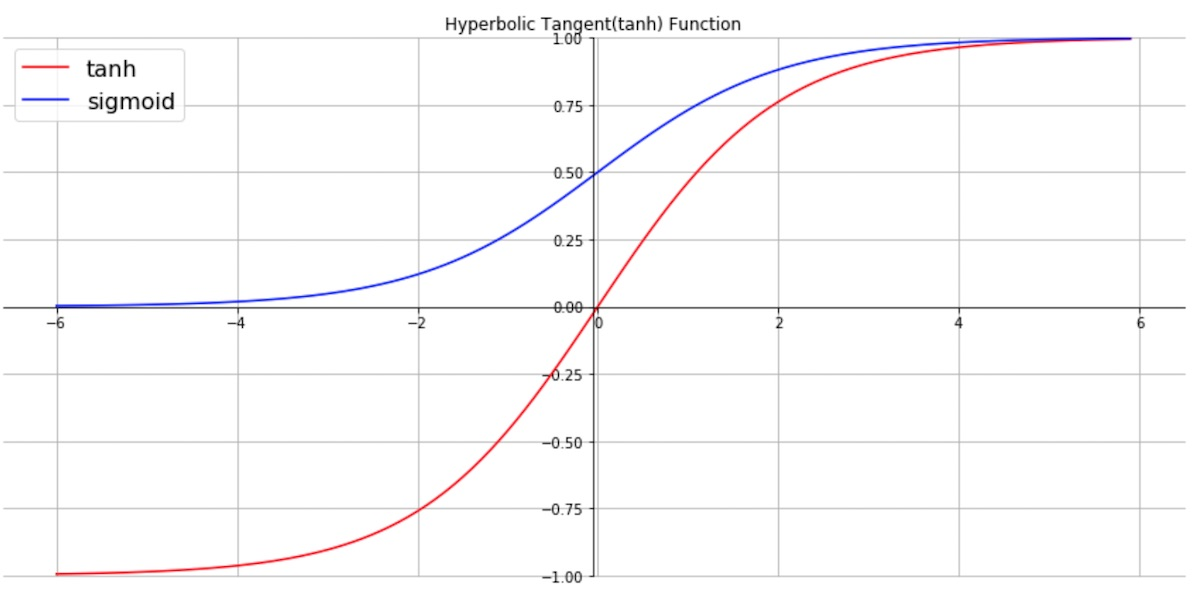

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

model = Sequential()
# SimpleRNN 층을 첫 번째 은닉층인 경우, input_shape를 명시
#model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1))) #units: output의 dimension, relu대신 tanh 사용
model.add(LSTM(units = 32, activation = 'tanh', input_shape = (n, 1)))
#model.add(GRU(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')  #mean squared error
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 40, batch_size = 20)

Epoch 1/40
18/18 [==============================] - 2s 4ms/step - loss: 243.2224
Epoch 2/40
18/18 [==============================] - 0s 4ms/step - loss: 229.8343
Epoch 3/40
18/18 [==============================] - 0s 4ms/step - loss: 217.9364
Epoch 4/40
18/18 [==============================] - 0s 4ms/step - loss: 206.0828
Epoch 5/40
18/18 [==============================] - 0s 4ms/step - loss: 194.7495
Epoch 6/40
18/18 [==============================] - 0s 6ms/step - loss: 182.8441
Epoch 7/40
18/18 [==============================] - 0s 6ms/step - loss: 171.1707
Epoch 8/40
18/18 [==============================] - 0s 6ms/step - loss: 160.2768
Epoch 9/40
18/18 [==============================] - 0s 5ms/step - loss: 150.2005
Epoch 10/40
18/18 [==============================] - 0s 5ms/step - loss: 141.0299
Epoch 11/40
18/18 [==============================] - 0s 5ms/step - loss: 133.5847
Epoch 12/40
18/18 [==============================] - 0s 6ms/step - loss: 126.8047
Epoch 13/40
18/18 [======

## 5. 예측 VS Actual


1/1 [==============================] - 0s 462ms/step


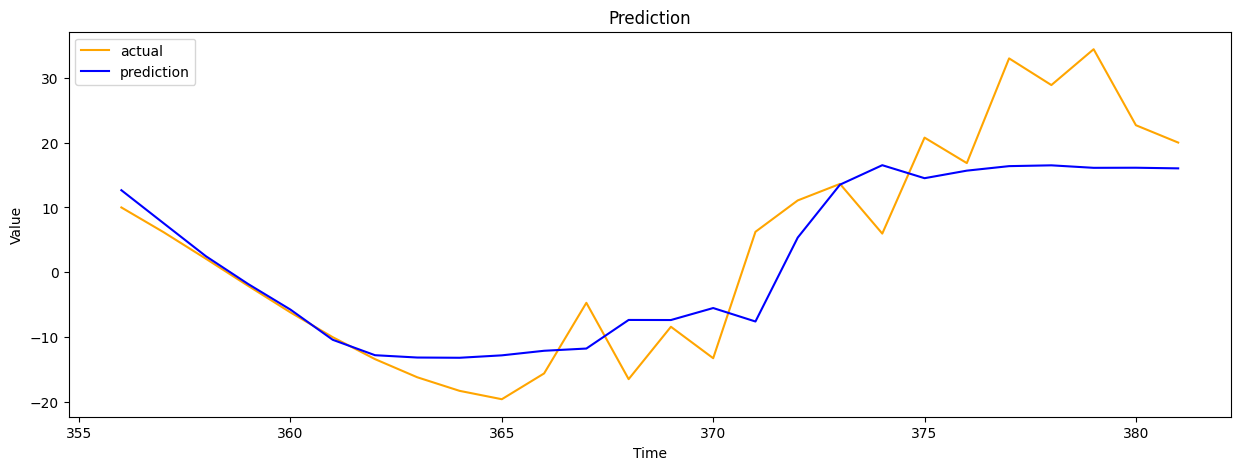

In [ ]:
pred = model.predict(x_test)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='actual')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

In [ ]:
np.mean( (pred - y_test)**2 )

57.485615575151584

# RNN 이해 및 실습 2
## 1. 시계열 데이터




In [ ]:
# 다른 종목 주가를 다운로드
# 기간 변경
# n 5 10 15
# 파티셔닝: 순차적, 3:1
# SimpleRNN, LSTM, GRU  / 노드 숫자도 변경...
# model.summary()
# model.get_weights()
# 은닉층 추가


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

AMZN = yf.download('NVDA', start="2020-01-01", end="2023-12-31")

AMZN = AMZN.round(2)

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

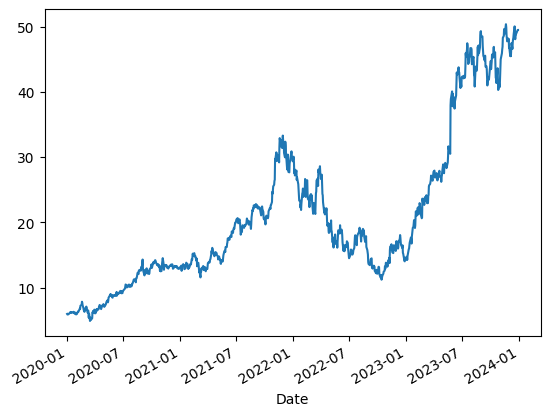

In [ ]:
AMZN["Adj Close"].plot()

In [ ]:
n = 5
x, y = make_sequence(AMZN["Adj Close"], n)
x = x.reshape(-1, n, 1)
y = y.reshape(-1, 1)

In [ ]:
print(x.shape)
print(y.shape)

(1001, 5, 1)
(1001, 1)


In [ ]:
test_len = 750
x_train = x[:test_len]
y_train = y[:test_len]
x_test = x[test_len:]
y_test = y[test_len:]

print('train:', x_train.shape, y_train.shape)
print('test:',x_test.shape, y_test.shape)

train: (750, 5, 1) (750, 1)
test: (251, 5, 1) (251, 1)


## 2. SimpleRNN 구축

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

model = Sequential()
# SimpleRNN 층을 첫 번째 은닉층인 경우, input_shape를 명시
#model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1))) #units: output의 dimension, relu대신 tanh 사용
model.add(LSTM(units = 32, activation = 'tanh', input_shape = (n, 1)))
#model.add(GRU(units = 32, activation = 'tanh', input_shape = (n, 1)))

#rnn은 이전 단계의 가중치를 사용하며, relu 를 사용하면, 역전파 시 이전 단계의 그라디언트와 같이 사용되면 출력이 발산
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')  #mean squared error
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4352      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 50, batch_size = 50)

Epoch 1/50
15/15 [==============================] - 3s 3ms/step - loss: 282.0764
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 256.6706
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 228.6283
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 198.7345
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 170.0162
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 147.2551
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 130.3661
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 117.5910
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: 104.8977
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 92.8435
Epoch 11/50
15/15 [==============================] - 0s 3ms/step - loss: 82.7469
Epoch 12/50
15/15 [==============================] - 0s 4ms/step - loss: 74.3165
Epoch 13/50
15/15 [=========

## 3. SimpleRNN 예측 VS Actual


In [ ]:
pred = model.predict(x_test)
pred

In [ ]:
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

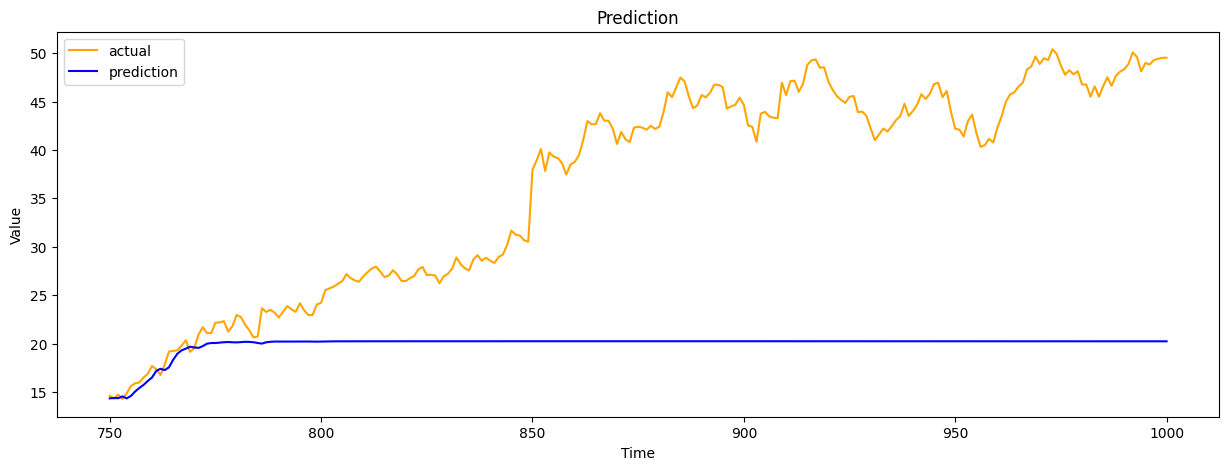

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='actual')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

## 4. LSTM 사용 및 예측 결과

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

LSTM_model = Sequential()
LSTM_model.add(LSTM(units = 50, activation = 'tanh', input_shape = (n, 1), return_sequences=True))
LSTM_model.add(LSTM(units = 50, activation = 'tanh'))
LSTM_model.add(Dense(1, activation = 'linear'))

LSTM_model.compile(optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=False), loss = 'mse')  #mean squared error
LSTM_model.fit(x_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
5/5 [==============================] - 3s 14ms/step - loss: 11036.5928
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 4828.2236
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 2256.1096
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 2043.0601
Epoch 5/50
5/5 [==============================] - 0s 15ms/step - loss: 1609.4381
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 1158.6005
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 1274.4406
Epoch 8/50
5/5 [==============================] - 0s 14ms/step - loss: 977.3279
Epoch 9/50
5/5 [==============================] - 0s 14ms/step - loss: 928.1699
Epoch 10/50
5/5 [==============================] - 0s 15ms/step - loss: 896.4691
Epoch 11/50
5/5 [==============================] - 0s 21ms/step - loss: 785.9811
Epoch 12/50
5/5 [==============================] - 0s 20ms/step - loss: 780.3199
Epoch 13/50
5/5 [============

In [ ]:
pred = model.predict(x_test)
pred

8/8 [==============================] - 0s 3ms/step


array([[ 90.72784 ],
       [ 90.71253 ],
       [ 91.07931 ],
       [ 90.9239  ],
       [ 90.532845],
       [ 91.11424 ],
       [ 91.475044],
       [ 92.28492 ],
       [ 94.95103 ],
       [ 95.105225],
       [ 97.27697 ],
       [ 95.8668  ],
       [ 95.15393 ],
       [ 93.88723 ],
       [ 96.322365],
       [ 96.94343 ],
       [ 96.023865],
       [ 96.583176],
       [ 98.6764  ],
       [102.632935],
       [101.42535 ],
       [104.05869 ],
       [106.85864 ],
       [115.93052 ],
       [105.60656 ],
       [103.23088 ],
       [103.17103 ],
       [100.88206 ],
       [ 98.52209 ],
       [ 97.444176],
       [ 99.17945 ],
       [ 99.76754 ],
       [101.49711 ],
       [ 98.63537 ],
       [ 97.05091 ],
       [ 94.7241  ],
       [ 95.24214 ],
       [ 95.34399 ],
       [ 93.800644],
       [ 93.81571 ],
       [ 94.11038 ],
       [ 92.9999  ],
       [ 92.942085],
       [ 94.524765],
       [ 93.90175 ],
       [ 93.715805],
       [ 93.91796 ],
       [ 93.0

In [ ]:
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

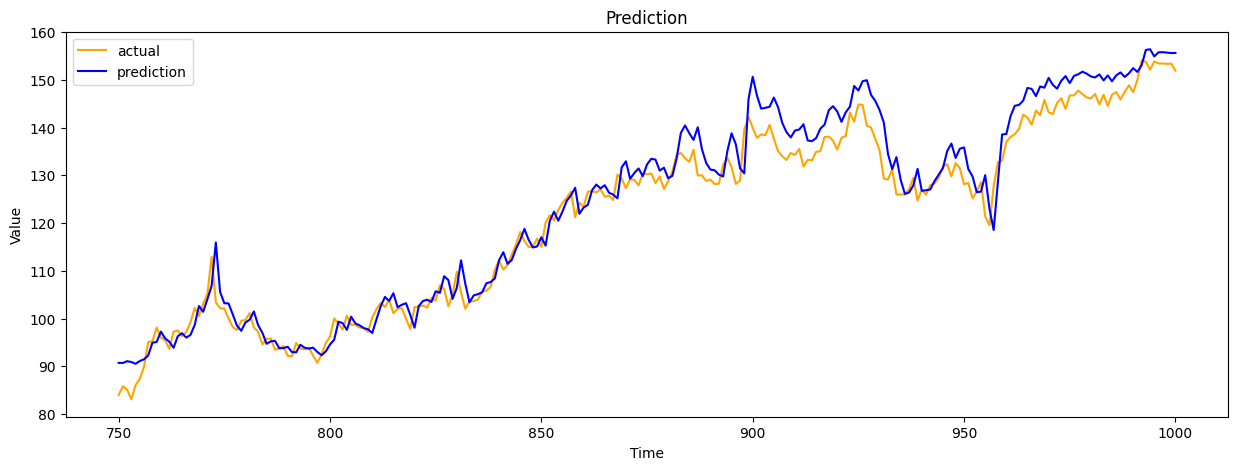

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='actual')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()